In [1]:
import pandas as pd
import numpy as np
from datetime import datetime
import nltk
import re

## Datenvorbereitung

In [2]:
df = pd.read_excel("data_analyst_recommendations.xlsx")

In [3]:
def convert_date_format(date_str):
    if date_str == "Fr":
        # Ersetzen Sie "Fr" durch ein leeres Zeichen
        date_str = date_str.replace("Fr", "02.02.").strip()

    # Überprüfen Sie, ob das Jahr bereits vorhanden ist
    if len(date_str.split(".")[2]) == 0:
        # Fügen Sie das Jahr hinzu (nehmen Sie das aktuelle Jahr an, wenn nicht angegeben)
        date_str = f"{date_str}{datetime.now().year}"
        date_str = datetime.strptime(date_str, "%d.%m.%Y")
    else:
        date_str = datetime.strptime(date_str, "%d.%m.%y")

    # Formatieren Sie das Datum für die Ausgabe
    return date_str.strftime("%d.%m.%Y")

In [4]:
formatted_dates = [convert_date_format(date) for date in df["date"]]
df["date"] = formatted_dates

In [5]:
df["date"] = pd.to_datetime(df["date"], format="%d.%m.%Y")

In [6]:
df.set_index("date", inplace=True)

In [7]:
df

,title,link,recommendation
date,,,
2024-02-02,DEUTSCHE BANK RESEARCH stuft SIEMENS AG auf 'Buy',https://www.finanznachrichten.de/nachrichten-2...,FRANKFURT (dpa-AFX Analyser) - Deutsche Bank R...
2024-01-23,BERNSTEIN RESEARCH stuft SIEMENS AG auf 'Outpe...,https://www.finanznachrichten.de/nachrichten-2...,NEW YORK (dpa-AFX Analyser) - Das US-Analyseha...
2024-01-22,JPMORGAN stuft SIEMENS AG auf 'Overweight',https://www.finanznachrichten.de/nachrichten-2...,NEW YORK (dpa-AFX Analyser) - Die US-Bank JPMo...
2024-01-22,DZ BANK stuft SIEMENS AG auf 'Kaufen',https://www.finanznachrichten.de/nachrichten-2...,FRANKFURT (dpa-AFX Analyser) - Die DZ Bank hat...
2024-01-15,JPMORGAN stuft SIEMENS AG auf 'Overweight',https://www.finanznachrichten.de/nachrichten-2...,NEW YORK (dpa-AFX Analyser) - Die US-Bank JPMo...
...,...,...,...
2023-02-09,DEUTSCHE BANK RESEARCH stuft SIEMENS AG auf 'Buy',https://www.finanznachrichten.de/nachrichten-2...,FRANKFURT (dpa-AFX Analyser) - Deutsche Bank R...
2023-02-09,BARCLAYS stuft SIEMENS AG auf 'Underweight',https://www.finanznachrichten.de/nachrichten-2...,LONDON (dpa-AFX Analyser) - Die britische Inve...
2023-02-09,GOLDMAN SACHS stuft SIEMENS AG auf 'Buy',https://www.finanznachrichten.de/nachrichten-2...,NEW YORK (dpa-AFX Analyser) - Die US-Investmen...


## Datenbereinigung

In [8]:
cities = [city.split(" - ")[0] for city in df["recommendation"]]
recommendations = [recommendation.split(" - ")[1] for recommendation in df["recommendation"]]

In [9]:
recommendations_cleaned = [recommendation.split("./")[0] for recommendation in recommendations]

In [10]:
cities_cleaned = [city.split(" (")[0] for city in cities]

In [11]:
df["recommendation"] = recommendations_cleaned

In [12]:
df["city"] = cities_cleaned

In [13]:
df

,title,link,recommendation,city
date,,,,
2024-02-02,DEUTSCHE BANK RESEARCH stuft SIEMENS AG auf 'Buy',https://www.finanznachrichten.de/nachrichten-2...,Deutsche Bank Research hat die Einstufung für ...,FRANKFURT
2024-01-23,BERNSTEIN RESEARCH stuft SIEMENS AG auf 'Outpe...,https://www.finanznachrichten.de/nachrichten-2...,Das US-Analysehaus Bernstein Research hat die ...,NEW YORK
2024-01-22,JPMORGAN stuft SIEMENS AG auf 'Overweight',https://www.finanznachrichten.de/nachrichten-2...,Die US-Bank JPMorgan hat die Einstufung für Si...,NEW YORK
2024-01-22,DZ BANK stuft SIEMENS AG auf 'Kaufen',https://www.finanznachrichten.de/nachrichten-2...,Die DZ Bank hat den fairen Wert für die Aktien...,FRANKFURT
2024-01-15,JPMORGAN stuft SIEMENS AG auf 'Overweight',https://www.finanznachrichten.de/nachrichten-2...,Die US-Bank JPMorgan hat die Einstufung für Si...,NEW YORK
...,...,...,...,...
2023-02-09,DEUTSCHE BANK RESEARCH stuft SIEMENS AG auf 'Buy',https://www.finanznachrichten.de/nachrichten-2...,Deutsche Bank Research hat das Kursziel für Si...,FRANKFURT
2023-02-09,BARCLAYS stuft SIEMENS AG auf 'Underweight',https://www.finanznachrichten.de/nachrichten-2...,Die britische Investmentbank Barclays hat die ...,LONDON
2023-02-09,GOLDMAN SACHS stuft SIEMENS AG auf 'Buy',https://www.finanznachrichten.de/nachrichten-2...,Die US-Investmentbank Goldman Sachs hat Siemen...,NEW YORK


## Stoppwörter ausschließen

In [14]:
# Extrahieren aller label aus den Titeln, um diese als Stopwörter auszuschließen
stopwords = set()

for title in df["title"]:
    stopwords.update(re.findall(r"'([^']*)'", title))

In [15]:
# Definition einer Liste mit diesen Stoppwörtern
custom_stopwords = [word.lower() for word in stopwords]

In [16]:
# Manuelle Ergänzungen der Liste
custom_stopwords.append("''")
custom_stopwords.append("``")
custom_stopwords

['buy',
 'neutral',
 'kaufen',
 'underperform',
 'underweight',
 'outperform',
 'hold',
 'overweight',
 "''",
 '``']

In [17]:
filtered_text_list = []

In [18]:
# Tokenisieren Sie den Text
for text in df["recommendation"]:
    # Tokenisieren der Empfehlungen
    tokenized_text = nltk.word_tokenize(text)

    # Stopwörter aus Text entfernen
    filtered_tokens = [word for word in tokenized_text if word.lower() not in custom_stopwords]

    # Verbinden der verbleibenden Wörter zu einem Text
    filtered_text = ' '.join(filtered_tokens)

    filtered_text_list.append(filtered_text)

In [19]:
filtered_text_list_cleaned = [text.replace(" .", ".").replace(" ,", ",") for text in filtered_text_list]

In [20]:
df["recommendation_cleaned"] = filtered_text_list_cleaned

In [21]:
df

,title,link,recommendation,city,recommendation_cleaned
date,,,,,
2024-02-02,DEUTSCHE BANK RESEARCH stuft SIEMENS AG auf 'Buy',https://www.finanznachrichten.de/nachrichten-2...,Deutsche Bank Research hat die Einstufung für ...,FRANKFURT,Deutsche Bank Research hat die Einstufung für ...
2024-01-23,BERNSTEIN RESEARCH stuft SIEMENS AG auf 'Outpe...,https://www.finanznachrichten.de/nachrichten-2...,Das US-Analysehaus Bernstein Research hat die ...,NEW YORK,Das US-Analysehaus Bernstein Research hat die ...
2024-01-22,JPMORGAN stuft SIEMENS AG auf 'Overweight',https://www.finanznachrichten.de/nachrichten-2...,Die US-Bank JPMorgan hat die Einstufung für Si...,NEW YORK,Die US-Bank JPMorgan hat die Einstufung für Si...
2024-01-22,DZ BANK stuft SIEMENS AG auf 'Kaufen',https://www.finanznachrichten.de/nachrichten-2...,Die DZ Bank hat den fairen Wert für die Aktien...,FRANKFURT,Die DZ Bank hat den fairen Wert für die Aktien...
2024-01-15,JPMORGAN stuft SIEMENS AG auf 'Overweight',https://www.finanznachrichten.de/nachrichten-2...,Die US-Bank JPMorgan hat die Einstufung für Si...,NEW YORK,Die US-Bank JPMorgan hat die Einstufung für Si...
...,...,...,...,...,...
2023-02-09,DEUTSCHE BANK RESEARCH stuft SIEMENS AG auf 'Buy',https://www.finanznachrichten.de/nachrichten-2...,Deutsche Bank Research hat das Kursziel für Si...,FRANKFURT,Deutsche Bank Research hat das Kursziel für Si...
2023-02-09,BARCLAYS stuft SIEMENS AG auf 'Underweight',https://www.finanznachrichten.de/nachrichten-2...,Die britische Investmentbank Barclays hat die ...,LONDON,Die britische Investmentbank Barclays hat die ...
2023-02-09,GOLDMAN SACHS stuft SIEMENS AG auf 'Buy',https://www.finanznachrichten.de/nachrichten-2...,Die US-Investmentbank Goldman Sachs hat Siemen...,NEW YORK,Die US-Investmentbank Goldman Sachs hat Siemen...


## FinBERT

In [23]:
from transformers import pipeline
pipe = pipeline("text-classification", model="scherrmann/GermanFinBert_SC_Sentiment")

In [32]:
# Definition einer Funktion, die einen Text (Analystenempfehlung) einliest und das Sentiment auf BAsis von FinBert ermittelt (Positiv=1, Neutral=0, Negativ=-1)
def calculate_sentiment(text):
    if pipe(text)[0]["label"] == "Positiv":
        sentiment = 1
    elif pipe(text)[0]["label"] == "Negativ":
        sentiment = -1
    else:
        sentiment = 0

    return sentiment

In [37]:
# Iteration über die Analystenempfehlungen und Ermittlung des Sentiments
sentiment_finbert = []
# counter = 0

for text in df["recommendation_cleaned"]:
    # if counter < 20:
        sentiment = calculate_sentiment(text)
        sentiment_finbert.append(sentiment)
    # else:
        # break
    # counter += 1

In [39]:
df["sentiment_finbert"] = sentiment_finbert

In [40]:
df

,title,link,recommendation,city,recommendation_cleaned,sentiment_finbert
date,,,,,,
2024-02-02,DEUTSCHE BANK RESEARCH stuft SIEMENS AG auf 'Buy',https://www.finanznachrichten.de/nachrichten-2...,Deutsche Bank Research hat die Einstufung für ...,FRANKFURT,Deutsche Bank Research hat die Einstufung für ...,1
2024-01-23,BERNSTEIN RESEARCH stuft SIEMENS AG auf 'Outpe...,https://www.finanznachrichten.de/nachrichten-2...,Das US-Analysehaus Bernstein Research hat die ...,NEW YORK,Das US-Analysehaus Bernstein Research hat die ...,1
2024-01-22,JPMORGAN stuft SIEMENS AG auf 'Overweight',https://www.finanznachrichten.de/nachrichten-2...,Die US-Bank JPMorgan hat die Einstufung für Si...,NEW YORK,Die US-Bank JPMorgan hat die Einstufung für Si...,1
2024-01-22,DZ BANK stuft SIEMENS AG auf 'Kaufen',https://www.finanznachrichten.de/nachrichten-2...,Die DZ Bank hat den fairen Wert für die Aktien...,FRANKFURT,Die DZ Bank hat den fairen Wert für die Aktien...,1
2024-01-15,JPMORGAN stuft SIEMENS AG auf 'Overweight',https://www.finanznachrichten.de/nachrichten-2...,Die US-Bank JPMorgan hat die Einstufung für Si...,NEW YORK,Die US-Bank JPMorgan hat die Einstufung für Si...,0
...,...,...,...,...,...,...
2023-02-09,DEUTSCHE BANK RESEARCH stuft SIEMENS AG auf 'Buy',https://www.finanznachrichten.de/nachrichten-2...,Deutsche Bank Research hat das Kursziel für Si...,FRANKFURT,Deutsche Bank Research hat das Kursziel für Si...,1
2023-02-09,BARCLAYS stuft SIEMENS AG auf 'Underweight',https://www.finanznachrichten.de/nachrichten-2...,Die britische Investmentbank Barclays hat die ...,LONDON,Die britische Investmentbank Barclays hat die ...,1
2023-02-09,GOLDMAN SACHS stuft SIEMENS AG auf 'Buy',https://www.finanznachrichten.de/nachrichten-2...,Die US-Investmentbank Goldman Sachs hat Siemen...,NEW YORK,Die US-Investmentbank Goldman Sachs hat Siemen...,1


## Plot

In [54]:
from matplotlib import pyplot as plt

In [96]:
df_monthly = df[["sentiment_finbert"]].resample("MS").mean()
df_monthly_count = df[["sentiment_finbert"]].resample("MS").count().rename(columns={"sentiment_finbert": "sentiment_finbert_count"})
df_weekly = df[["sentiment_finbert"]].resample("W").mean()
df_weekly_count = df[["sentiment_finbert"]].resample("W").count().rename(columns={"sentiment_finbert": "sentiment_finbert_count"})
df_daily = df[["sentiment_finbert"]].resample("D").mean()
df_daily = df_daily.dropna(subset=["sentiment_finbert"])
df_daily_count = df[["sentiment_finbert"]].resample("D").count().dropna(subset=["sentiment_finbert"]).rename(columns={"sentiment_finbert": "sentiment_finbert_count"})

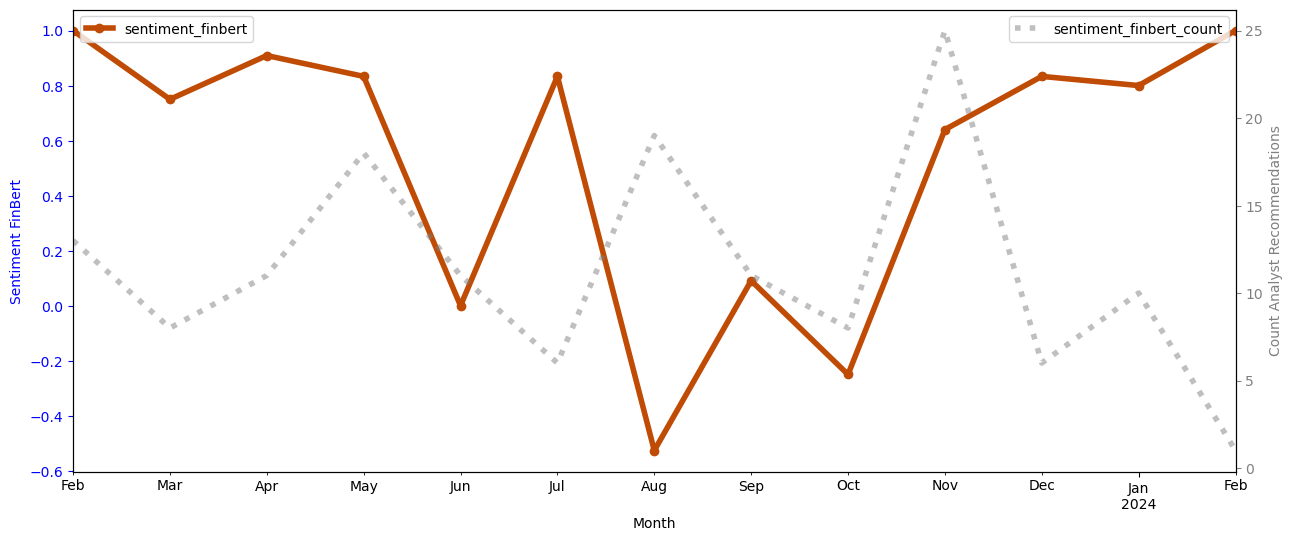

In [95]:
# Monthly Plot
fig, ax = plt.subplots(figsize=(15, 6))

df_monthly.plot(ax=ax, color="#bf4b04", marker="o", label="Sentiment FinBert", lw=4)
ax.set_xlabel('Month')
ax.set_ylabel('Sentiment FinBert', color='b')
ax.tick_params('y', colors='b')
ax.legend(loc='upper left')


ax2 = ax.twinx()

df_monthly_count.plot(ax=ax2, color='grey', label='Count Analyst Recommendations', alpha=0.5, ls=":", lw=4)
ax2.set_ylabel('Count Analyst Recommendations', color='grey')
ax2.tick_params('y', colors='grey')
ax2.legend(loc='upper right')


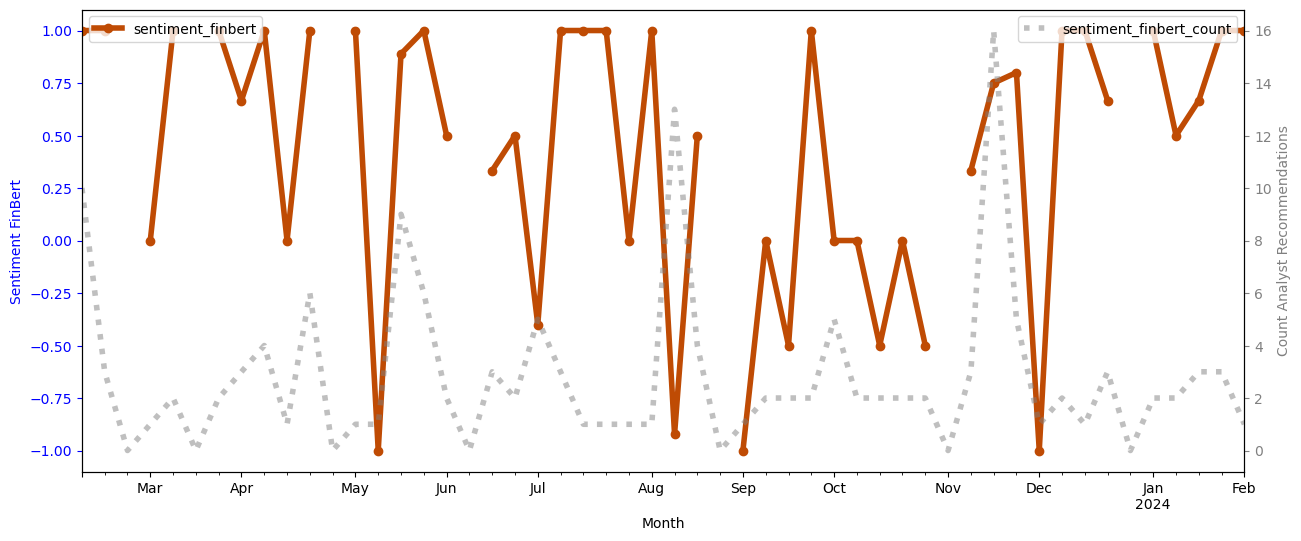

In [97]:
# Weekly Plot
fig, ax = plt.subplots(figsize=(15, 6))

df_weekly.plot(ax=ax, color="#bf4b04", marker="o", label="Sentiment FinBert", lw=4)
ax.set_xlabel('Month')
ax.set_ylabel('Sentiment FinBert', color='b')
ax.tick_params('y', colors='b')
ax.legend(loc='upper left')


ax2 = ax.twinx()

df_weekly_count.plot(ax=ax2, color='grey', label='Count Analyst Recommendations', alpha=0.5, ls=":", lw=4)
ax2.set_ylabel('Count Analyst Recommendations', color='grey')
ax2.tick_params('y', colors='grey')
ax2.legend(loc='upper right')
